### Creating a single edge list (PPI + GNBR)

In [94]:
import pandas as pd
x = pd.read_csv('../dataset_collection/GNBR-edgelist.txt',header=2, delimiter='\t')
x = x.rename(columns={x.columns[0]:0,x.columns[1]:1})

#y = pd.read_csv('../dataset_collection/PP-Decagon_ppi.csv',header=None)

#z = pd.concat([x,y])

In [3]:
x.to_csv('../dataset_collection/GNBR-edgelist.csv',
         index=False, header=False)

In [ ]:
z.to_csv('../dataset_collection/Decagon_GNBR.csv',
         index=False, header=False)

### Plotting results

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import numpy as np
import os
import ast
import seaborn as sns

In [133]:
skip = ['bensmodels/GConv_GNBR_nofeat2']
#skip = ['bensmodels/SAGEConv_GNBR_feat','bensmodels/GConv_GNBR_feat']

In [165]:
np.sort(glob.glob('bensmodels/*'))

array(['bensmodels/GConv_GNBR_feat', 'bensmodels/GConv_GNBR_nofeat',
       'bensmodels/GConv_GNBR_nofeat2', 'bensmodels/GConv_PPI_GNBR_feat',
       'bensmodels/GConv_PPI_GNBR_nofeat', 'bensmodels/GConv_PPI_feat',
       'bensmodels/GConv_PPI_nofeat', 'bensmodels/SAGEConv_GNBR_feat',
       'bensmodels/SAGEConv_GNBR_nofeat',
       'bensmodels/SAGEConv_PPI_GNBR_feat',
       'bensmodels/SAGEConv_PPI_GNBR_nofeat',
       'bensmodels/SAGEConv_PPI_feat', 'bensmodels/SAGEConv_PPI_nofeat'],
      dtype='<U35')

In [191]:
dirs = [
 'bensmodels/SAGEConv_PPI_GNBR_feat',
 'bensmodels/SAGEConv_PPI_GNBR_nofeat',
 'bensmodels/SAGEConv_GNBR_feat',
 'bensmodels/SAGEConv_GNBR_nofeat',
 'bensmodels/SAGEConv_PPI_feat',
 'bensmodels/SAGEConv_PPI_nofeat',
 'bensmodels/GConv_PPI_GNBR_feat',
 'bensmodels/GConv_PPI_GNBR_nofeat',
 'bensmodels/GConv_GNBR_feat',
 'bensmodels/GConv_GNBR_nofeat',
 'bensmodels/GConv_PPI_feat',
 'bensmodels/GConv_PPI_nofeat',]

In [192]:
## Create Heatmap

recalls = {}
rows = []
#dirs = np.sort(glob.glob('bensmodels/*'))[::-1]

for directory in dirs:
    
    if directory in skip:
        continue

    results = {}
    for fname in os.listdir(directory):
        if fname[-4:] != '.txt': continue
        f = open(os.path.join(directory, fname), 'r')
        d = ast.literal_eval(f.read())
        results.update(d)
       
    recalls[directory] = []
    for key,val in results.items():
        recalls[directory].append(val[1]['recall'])
    
    rows.append(directory)

In [193]:
## Correcting for different lengths

recalls_mat = np.array([recalls[k][:517] for k in rows])
#recalls_mat = recalls_mat[recalls_mat[:,1].argsort()]

(-1, 12)

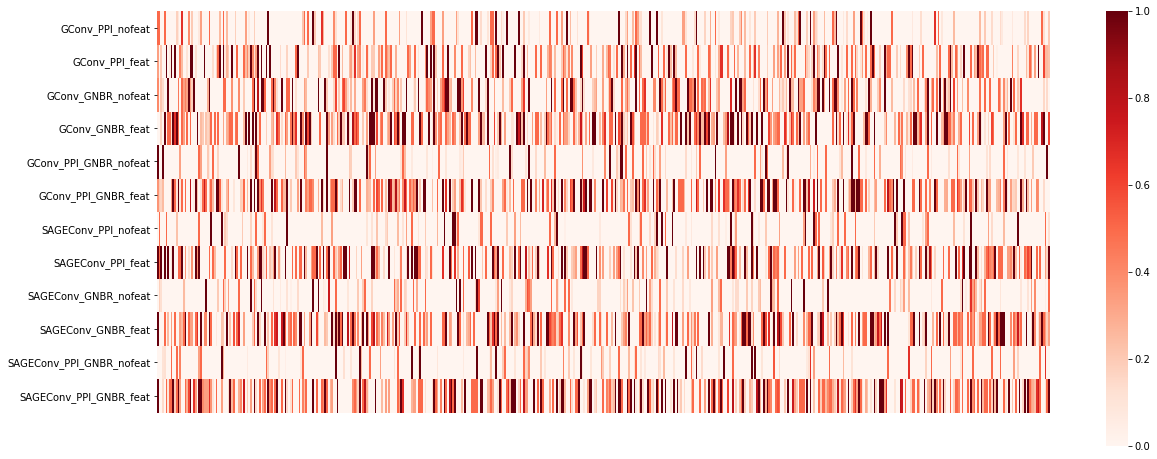

In [194]:
plt.figure(figsize = [20,8])
g = sns.heatmap(recalls_mat, cmap="Reds",
            xticklabels=False, 
            yticklabels=[f.split('/')[1] for f in rows])
#g.legend_.remove()
plt.ylim([-1,len(recalls)])